# 기술통계 > 기초통계량

## #01. 기술통계

기술통계란 자료를 그래프나 숫자등으로 요약하는 통계적 행위 및 관련 방법을 의미.

데이터의 분석에 앞서 전체적으로 데이터의 특징을 파악하고 데이터를 다양한 각도로 접근한다.

데이터를 요약하고 시각화해서 잘 설명하는 것에 중점을 두며 데이터에 대해서 쉽게 설명하기 위해서 시각화를 많이 활용한다.

기술 통계에서 기본적으로 사용하는 시각화 자료들은 `박스플롯(상자그림)`, `도수분포표`, `히스토그램`이 있으며 이를 기반으로 사실을 객관적으로 확인하는 것을 중점으로 한다.

## #02. 기술통계 절차

### 1. 데이터의 전체 크기와 형태 확인

-   행과 열의 수를 확인한다.
-   10만건의 데이터 전체를 출력하는 것은 매우 부담이 큰 처리이므로 상위 n건, 하위 n건의 일부만을 확인한다.

### 2. 수치형 데이터

#### 1) 집단의 특성을 잘 나타내는 요약 통계량을 확인한다.

-   평균, 중앙값, 표준편차, 범위(최대값~최소값), 사분위수 등을 확인한다.
-   요약통계량을 상자그림으로 시각화하여 확인한다.

#### 2) 전체 데이터의 분포를 확인한다.

-   구간별 자료의 개수를 나타내는 표(=도수분포표)를 산정한다.
-   도수 분포표를 그래프로 표현한 히스토그램을 확인한다.

### 3. 범주형 데이터

-   데이터의 빈도수를 확인한다.

## #03. 작업 준비

### 1. 패키지 참조


In [62]:
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

### 2. 데이터 가져오기


In [63]:
df = read_excel("https://data.hossam.kr/D02/ad-sales.xlsx", index_col="월")
df

,광고비(백만원),매출액(억원)
월,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


### 3. 데이터 전처리


In [64]:
df.rename(columns={'광고비(백만원)': 'adv', '매출액(억원)': 'sales'}, inplace=True)
df.index.name = 'month'
df

,adv,sales
month,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


## #04. 기초통계량

### 1. 데이터의 범위

`최대값~최소값`의 구간을 의미


In [65]:
max_adv = df['adv'].max()
min_adv = df['adv'].min()

"광고비 구간은 {min}~{max}백만원 입니다.".format(max=max_adv, min=min_adv)

'광고비 구간은 2~237백만원 입니다.'

In [66]:
max_sales = df['sales'].max()
min_sales = df['sales'].min()

"매출액 구간은 {min}~{max}억원 입니다.".format(max=max_sales, min=min_sales)

'매출액 구간은 100~1690억원 입니다.'

### 2. 합계


In [67]:
sum_adv = df['adv'].sum()
sum_sales = df['sales'].sum()

"광고비의 총 합은 %d백만원이고, 매출액의 총 합은 %d억원 입니다." % (sum_adv, sum_sales)

'광고비의 총 합은 1768백만원이고, 매출액의 총 합은 6458억원 입니다.'

### 3. 평균

모든 값을 더한 후 개수로 나눈 값.

```
1, 2, 3, 4, 5, 100의 평균은 (1+2+3+4+5+100)/6 이므로 19.17이다.
```

평균은 특정 값이 다른 값들의 범위와 차이가 큰 경우 신뢰도가 떨어진다.

위의 데이터에서 100에 해당하는 값은 다른 값들에 비해 극단적으로 높다. 이러한 값을 극단치라고 한다.


In [68]:
mean_adv = df['adv'].mean()
mean_sales = df['sales'].mean()

"광고비의 평균은 %d백만원이고, 매출액의 평균은 %d억원 입니다." % (mean_adv, mean_sales)

'광고비의 평균은 147백만원이고, 매출액의 평균은 538억원 입니다.'

### 4. 중앙값 ($m_e$)

모든 값을 순서대로 정렬한 후 가운데 위치의 값.

평균의 신뢰도가 현저히 낮을 경우 데이터의 분포를 확인하기 위해 사용한다.

#### 데이터의 수가 홀수인 경우

-   모든 값을 순서대로 정렬한 후 가운데 위치의 값.
-   `1, 2, 3, 4, 5`의 중앙값은 `3`이다.

$m_e = x{(\frac{n+1}2)}$

#### 데이터의 수가 짝수개인 경우

-   모든 값을 순서대로 정렬한 후 가운데 두 값의 평균.
-   `1, 2, 3, 4, 5, 6`의 중앙값은 `(3+4)/2`이므로 `3.5`이다.

$m_e = \frac{1}{2}{({x_{\frac{n}{2}} + {x_{\frac{n}{2}+1}}})}$


In [69]:
median_adv = df['adv'].median()
median_sales = df['sales'].median()

"광고비의 중앙값은 %d백만원이고, 매출액의 중앙값은 %d억원 입니다." % (median_adv, median_sales)

'광고비의 중앙값은 140백만원이고, 매출액의 중앙값은 425억원 입니다.'

### 5. 사분위 수

데이터 표본을 4개의 동일한 부분으로 나눈 값.

사분위수를 사용하여 데이터 집합의 범위와 중심 위치를 신속하게 평가할 수 있다.

이는 데이터를 이해하는 데 중요한 첫 번째 단계이다.

#### 사분위 수의 종류

| 용어               | 설명                                                   |
| ------------------ | ------------------------------------------------------ |
| 1사분위 수(Q1)     | 데이터의 하위 25%가 이 값보다 작거나 같음.             |
| 2사분위 수(Q2)     | 중위수 데이터의 50%가 이 값보다 작거나 같음. (=중앙값) |
| 3사분위 수(Q3)     | 데이터의 하위 75%가 이 값보다 작거나 같음.(=상위 25%)  |
| 사분위간 범위(IQR) | 3사분위 수부터 1사분위 수 구간                         |

-   사분위수는 데이터의 관측치가 아닌 계산된 값이다.
-   실존하지 않는 값이기 때문에 사분위수를 정확하게 계산하려면 종종 두 관측치 사이를 보간해야 한다.
-   중위수와 사분위간 범위는 극단치의 영향을 받지 않기 때문에 평균 및 표준 편차보다 치우침이 많은 데이터의 중심 위치와 범위의 더 나은 측도가 될 수 있다.

#### 1사분위 수

$Q_1 = ((총도수 + 1) \times 0.25)+1$

##### 사분위 수의 위치


In [70]:
adv = list(df['adv'])
총도수 = len(adv)
Q1 = ((총도수 + 1) * 0.25) + 1
print(Q1)

4.25


##### 사분위 수의 실제 값


In [71]:
df['adv'].quantile(q=0.25)

121.75

#### 2사분위 수

중앙값과 동일


In [72]:
df['adv'].quantile(q=0.5)

140.5

#### 3사분위 수

$Q_3 = ((총도수 + 1) \times 0.75)+1$


In [73]:
adv = list(df['adv'])
총도수 = len(adv)
Q3 = ((총도수 + 1) * 0.75) + 1
print(Q3)

10.75


In [74]:
df['adv'].quantile(q=0.75)

188.5

#### 사분위간 범위

$Q3 - Q1$


In [75]:
df['adv'].quantile(q=0.75) - df['adv'].quantile(q=0.25)

66.75

### 6. 분산, 표준편차


In [76]:
"광고비의 분산은 %f" % df['adv'].var()

'광고비의 분산은 3911.515152'

In [77]:
"광고비의 표준편차는 %f" % df['adv'].std()

'광고비의 표준편차는 62.542107'

### 7. 기초통계량 일괄 산출

#### 기초통계량 데이터 프레임 생성


In [78]:
desc = df.describe()
desc

,adv,sales
count,12.000000,12.000000
mean,147.333333,538.166667
std,62.542107,428.774540
min,2.000000,100.000000
25%,121.750000,273.500000
50%,140.500000,425.000000
75%,188.500000,652.500000
max,237.000000,1690.000000


##### 데이터 프레임의 전치 구하기


In [79]:
desc.T

,count,mean,std,min,25%,50%,75%,max
adv,12.0,147.333333,62.542107,2.0,121.75,140.5,188.5,237.0
sales,12.0,538.166667,428.774540,100.0,273.50,425.0,652.5,1690.0


## #05. 기초통계량 시각화

상자그림(`boxplot`)은 데이터의 범위 및 분포, 사분위 수, 이상치 등을 시각화 한 그래프

![boxplot](res/boxplot.png)

### 1. 그래프 전역 설정


In [80]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### 2. 모든 컬럼에 대한 일괄 생성


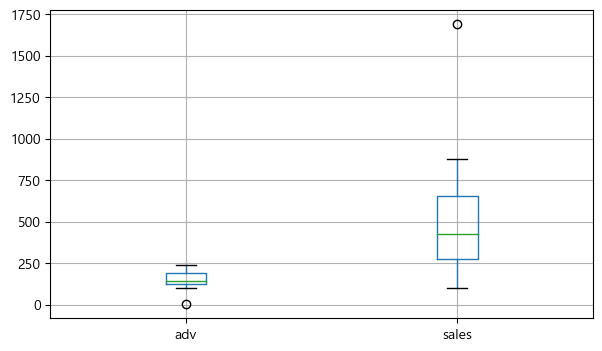

In [83]:
plt.figure()
plt.grid()      # 격자를 표시하고자 하는 경우 반드시 boxplot() 함수보다 먼저 표시해야 함    
df.boxplot()
plt.show()
plt.close()

### 3. 특정 컬럼만 시각화


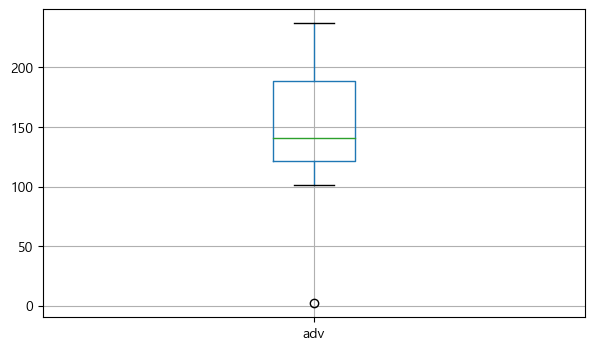

In [84]:
plt.figure()
plt.grid()
df.boxplot(['adv'])
plt.show()
plt.close()

### 3. 서브플롯을 활용한 상자그림


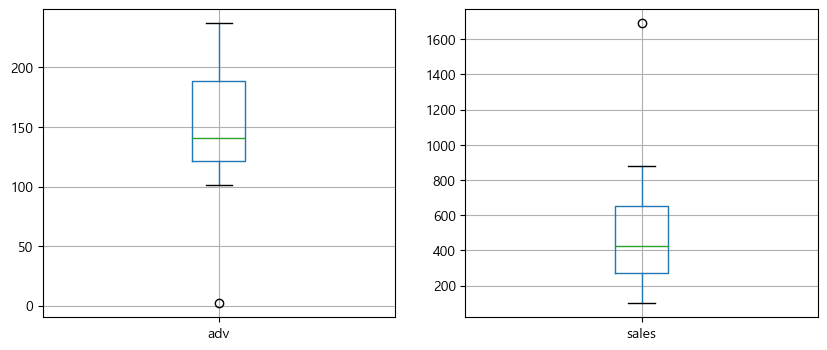

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
df.boxplot(['adv'], ax=ax1)
df.boxplot(['sales'], ax=ax2)
plt.show()
plt.close()

### 4. seaborn을 사용한 상자그림


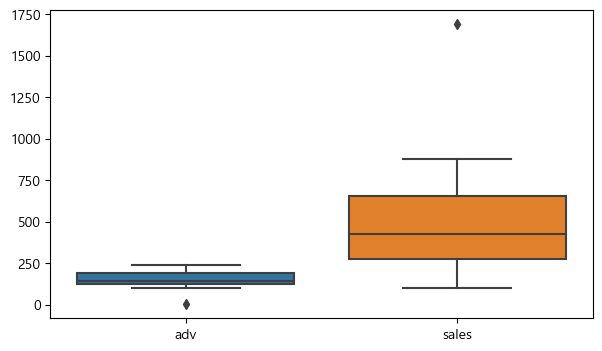

In [97]:
plt.rcParams["figure.figsize"] = (7, 4)
plt.figure()
sb.boxplot(data=df)
plt.show()
plt.close()

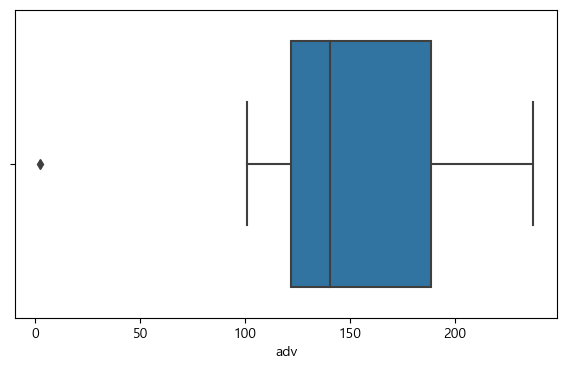

In [88]:
plt.figure()
sb.boxplot(data=df, x='adv')
plt.show()
plt.close()

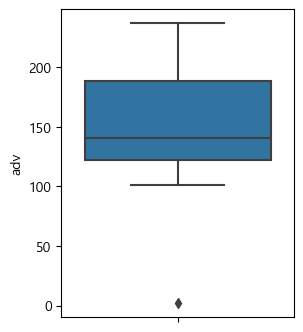

In [94]:
plt.rcParams["figure.figsize"] = (3, 4)
plt.figure()
sb.boxplot(data=df, y='adv')
plt.show()
plt.close()

## #06. 극단치 경계

데이터가 극단적으로 크거나 작은 값을 극단치(=이상치)라고 한다.

그 값을 결정하는 기준이 되는 값을 극단치 경계

### IQR

1사분위수와 3사분위수의 거리

$IQR = Q3 - Q1$

### 상한 극단치 경계

$상한 = Q3 + IQR * 1.5$

### 하한 극단치 경계

$하한 = Q1 - IQR * 1.5$


### 광고비에 대한 이상치 구하기


In [98]:
q1 = df['adv'].quantile(q=0.25)
q3 = df['adv'].quantile(q=0.75)
iqr = q3 - q1
하한 = q1 - iqr * 1.5
"광고비에 대한 하한 극단치 경계값: %f" % 하한

'광고비에 대한 하한 극단치 경계값: 21.625000'

In [99]:
df1 = df.query('adv < @하한')
df1['adv']

month
1월    2
Name: adv, dtype: int64

### 매출액에 대한 이상치 구하기


In [100]:
q1 = df['sales'].quantile(q=0.25)
q3 = df['sales'].quantile(q=0.75)
iqr = q3 - q1
상한 = q3 + iqr * 1.5
"매출액에 대한 상한 극단치 경계값: %f" % 상한

'매출액에 대한 상한 극단치 경계값: 1221.000000'

In [101]:
df2 = df.query('sales > @상한')
df2['sales']

month
2월    1690
Name: sales, dtype: int64